# HAPI - Basics

- https://hapi-server.org/
- https://github.com/heliophysicsPy/summer-school-24/tree/main/hapi-tutorial

In [ ]:
from hapiclient import hapi, hapitime2datetime
from hapiplot import hapiplot

In [ ]:
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg']

## Get Data

We'll be using data from the October 28, 2021 flare + CME event that started at 15:35 UTC.

The event started at 15:35 UTC on Oct 28, 2021 with a [X1 Flare](https://www.spaceweatherlive.com/en/news/view/445/20211028-x1-solar-flare-with-a-major-cme.html) and an accompanying coronal mass ejection (CME). The CME was predicted to arrive [at Earth on Oct 30](https://www.swpc.noaa.gov/news/geomagnetic-storm-watch-effect-30-31-oct) and induce activity through Oct 31. We will look at data fetched via HAPI for before, during, and after this event and see what patterns arise.

### Example 1: OMNIWeb Solar Wind via CDAWeb HAPI Server

- `DST1800`: Dst index
- `Proton_AI1800`: Solar wind mag density/kinetic energy density
- Oct 25 through Dec 5

---

- https://cdaweb.gsfc.nasa.gov/misc/NotesO.html
- https://omniweb.gsfc.nasa.gov/html/ow_data.html

The Low Resolution OMNI (LRO) data set is primarily a 1963-to-current compilation of hourly-averaged, near-Earth solar wind magnetic field and plasma parameter data from several spacecraft in geocentric or L1 (Lagrange point) orbits. 

- Server: CDAWeb
- Dataset: [OMNI2_H0_MRG1HR](https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR): OMNI Combined, Definitive, Hourly IMF and Plasma Data, and Energetic Proton Fluxes, Time-Shifted to the Nose of the Earth's Bow Shock, plus Solar and Magnetic Indices - J.H. King, N. Papitashvili (ADNET, NASA GSFC) 
- Time range: [2021-10-25T00:00:00Z, 2021-12-01T00:00:00Z] (This format follows ISO 8601 standard for representing dates and times; T means "time" and Z means "UTC")
- Parameters:
    - `DST1800`: Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2021/001-2024/182), Quick-look Dst (2024/183-2024/333), from WDC Kyoto (half-hour midpoint)
    - `Proton_QI1800`: Solar wind (magnetic energy density)/(kinetic energy density) (half-hour midpoint)

In [ ]:
# The data server
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'

# The data set
dataset    = 'OMNI2_H0_MRG1HR'

# Start and stop times
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'

# The HAPI convention is that parameters is a comma-separated list. Here we request two parameters.
parameters = 'DST1800,Proton_QI1800'

# Configuration options for the hapi function.
opts = {'logging': True, 'usecache': True, 'cachedir': './hapicache' }

# Get parameter data.
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

hapi(): Running hapi.py version 0.2.6
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Writing OMNI2_H0_MRG1HR___.json 
hapi(): Writing OMNI2_H0_MRG1HR___.pkl 
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/capabilities
hapi(): Writing https://cdaweb.gsfc.nasa.gov/hapi/data?id=OMNI2_H0_MRG1HR&parameters=DST1800,Proton_QI1800&time.min=2021-10-25T00:00:00Z&time.max=2021-12-01T00:00:00Z&format=binary to OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.bin
hapi(): Reading and parsing OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.bin
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.pkl
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800,Proton_QI1800_20211025T000000_20211201T000000.npy


### Inspect metadata

he `meta` dictionary contains the same metadata that would be returned as JSON from a URL request in a browser. For example, to obtain metadata when the above script was executed, the `hapi` function made a request to https://cdaweb.gsfc.nasa.gov/hapi/info?id=OMNI2_H0_MRG1HR, which returns metadata for all parameters in the dataset `OMNI2_H0_MRG1HR`.

In [ ]:
display(meta)

{'HAPI': '2.0',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesO.html#OMNI2_H0_MRG1HR',
 'contact': 'J.H. King, N. Papitashvili @ ADNET, NASA GSFC',
 'parameters': [{'name': 'Time',
   'length': 24,
   'units': 'UTC',
   'type': 'isotime',
   'fill': None},
  {'name': 'DST1800',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2024/122-2024/152), Quick-look Dst (2024/153-2024/290), from WDC Kyoto (half-hour midpoint)',
   'units': 'nT',
   'type': 'integer',
   'fill': '99999'},
  {'name': 'Proton_QI1800',
   'description': 'Solar wind (magnetic energy density)/(kinetic energy density) (half-hour midpoint)',
   'units': ' ',
   'type': 'double',
   'fill': '9.9999'}],
 'startDate': '1963-01-01T00:00:00Z',
 'stopDate': '2024-11-29T11:00:00Z',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'OMNI2_H0_MRG1HR',
 'x_parameters': 'DST1800,Proton_QI1800',
 'x_time.min': '2021-10-25T00:00:00Z',


### Plot data

We would expect to see some activity in the Oct 30-31 frame, as the CME reaches L1.

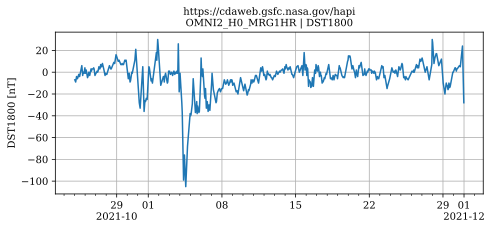

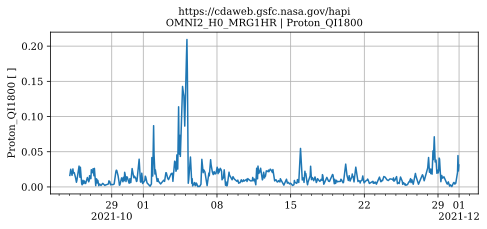

In [ ]:
hapiplot(data, meta);

### Extract dates + one data item

The HAPI standard is that all time values [are represented as ISO 8601 ASCII strings](https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#376-representation-of-time). The function `hapitime2datetime` can be used to convert these strings to Python `datetime` objects.

In [ ]:
dateBytes = data['Time']
print("\nFirst 5 values of Time parameter as byte literals = ")
display(dateBytes[0:5])

dateTimes = hapitime2datetime(data['Time'])
print("\nFirst 5 values of Time as datetimes = ")
display(dateTimes[0:5])

# Extract one of the parameters from data, a NumPy ndarray with named fields
BGSEc = data['DST1800']
print("\nDST1800 =")
display(BGSEc[0:5])


First 5 values of Time parameter as byte literals = 


array([b'2021-10-25T00:30:00.000Z', b'2021-10-25T01:30:00.000Z',
       b'2021-10-25T02:30:00.000Z', b'2021-10-25T03:30:00.000Z',
       b'2021-10-25T04:30:00.000Z'], dtype='|S24')


First 5 values of Time as datetimes = 


array([datetime.datetime(2021, 10, 25, 0, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 1, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 2, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 3, 30, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 25, 4, 30, tzinfo=<UTC>)], dtype=object)


DST1800 =


array([-7, -8, -9, -4, -4], dtype=int32)

### Example 2: DSCOVR satellite magnetic field measurement

https://cdaweb.gsfc.nasa.gov/misc/NotesD.html

- Server: CDAWeb
- Dataset: [DSCOVR_H0_MAG](https://cdaweb.gsfc.nasa.gov/misc/NotesD.html#DSCOVR_H0_MAG): DSCOVR Fluxgate Magnetometer 1-sec Definitive Data - A. Koval (UMBC, NASA/GSFC)
- Time range: [2021-10-25T00:00:00Z, 2021-12-01T00:00:00Z] 
- Parameters:
    - `B1F1`: Magnetic field magnitude (1 sec)

hapi(): Running hapi.py version 0.2.6
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Writing DSCOVR_H0_MAG___.json 
hapi(): Writing DSCOVR_H0_MAG___.pkl 
hapi(): Reading http://cdaweb.gsfc.nasa.gov/hapi/capabilities
hapi(): Writing http://cdaweb.gsfc.nasa.gov/hapi/data?id=DSCOVR_H0_MAG&parameters=B1F1&time.min=2021-10-25T00:00:00Z&time.max=2021-12-01T00:00:00Z&format=binary to DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.bin
hapi(): Reading and parsing DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.bin
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.pkl
hapi(): Writing ./hapicache/cdaweb.gsfc.nasa.gov_hapi/DSCOVR_H0_MAG_B1F1_20211025T000000_20211201T000000.npy


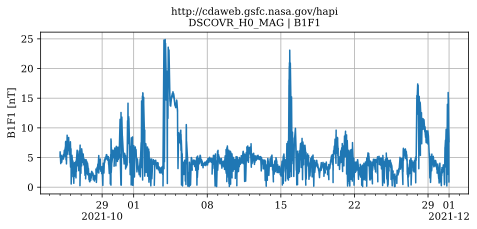

In [ ]:
server     = 'http://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'DSCOVR_H0_MAG'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
parameters = 'B1F1'

opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

# Get parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters in `data`
hapiplot(data, meta);

### Where is DSCOVR?

Often it is useful to know where a given spacecraft is. Coordinates are often available as a HAPI stream.  Here we get the DSCOVR position in GSE coordinates. And, for fun, the Moon's position as well. 

- Dataset: [DSCOVR_ORBIT_PRE](https://cdaweb.gsfc.nasa.gov/misc/NotesD.html#DSCOVR_ORBIT_PRE): DSCOVR Predicted Orbit - A. Szabo (NASA Goddard Space Flight Center)
- Parameters:
    - S/C position vector in GSE coordinates [GSE_POS]; S/C = spacecraft
    - Moon position vector in GSE coordinates [MOON_GSE_POS]

---

GSE: Geocentric Solar Ecliptic system. This has its X-axis pointing from the Earth toward the Sun and its Y-axis is chosen to be in the ecliptic plane pointing towards dusk (thus opposing planetary motion). Its Z-axis is parallel to the ecliptic pole. Relative to an inertial system this system has a yearly rotation.

- https://sscweb.gsfc.nasa.gov/users_guide/Appendix_C.shtml

---

- https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/dscovr-deep-space-climate-observatory

The Deep Space Climate Observatory, or DSCOVR, was launched in February of 2015. The DSCOVR mission succeeded NASA's Advanced Composition Explorer's (ACE) role in supporting solar wind alerts and warnings from the L1 orbit.

L1 is about [1.5 million kilometers](https://en.wikipedia.org/wiki/Lagrange_point) from Earth in the direction of the Sun.

The Moon is Earth's only natural satellite. It orbits at an average distance of [384,400 km](https://en.wikipedia.org/wiki/Moon).

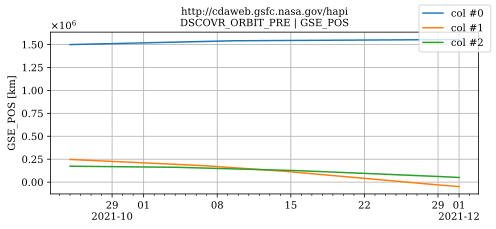

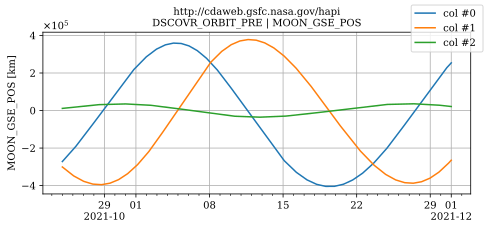

In [ ]:
# note we are using the same times etc from previous calls
dataset    = 'DSCOVR_ORBIT_PRE'
parameters = 'GSE_POS,MOON_GSE_POS'

opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache' }

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

### Parameter Order is Important!
To ensure that every HAPI query is identical, parameters MUST be requested in the order that their HAPI server's JSON description specifies.  For example, we queried for "GSE_POS, MOON_GSE_POS". If we switch the query order, we get a HAPI warning to correct that, as shown below. 

In [ ]:
#parameters = 'GSE_POS,MOON_GSE_POS'
parameters = 'MOON_GSE_POS,GSE_POS'
opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache' }
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

hapi(): Running hapi.py version 0.2.6
hapi(): file directory = ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading ./hapicache/cdaweb.gsfc.nasa.gov_hapi
hapi(): Writing DSCOVR_ORBIT_PRE___.json 
hapi(): Writing DSCOVR_ORBIT_PRE___.pkl 


HAPIError: Order of requested parameters does not match order of parameters in server info metadata.
  Order requested: MOON_GSE_POS,GSE_POS
  Order required: GSE_POS,MOON_GSE_POS


----

# A Note on Syntax

In the examples in this notebook, we typically use the syntax

```Python
server     = 'http://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'DSCOVR_H0_MAG'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-05T00:00:00Z'
parameters = 'B1F1'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
```

Most linters will flag the extra spaces before an `=`; however, for code examples, we find listing the input parameters in the form of a table improves readablility.

An alternative is to use `*` to unpack the regular arguments stored in a list. (We already use the `**` to unpack the keyword arguments stored in `opts`.).

```Python
args = [
            'https://cdaweb.gsfc.nasa.gov/hapi',
            'OMNI2_H0_MRG1HR',
            'DST1800,Proton_QI1800',
            '2021-10-25T00:00:00Z',
            '2021-12-05T00:00:00Z'
        ]
kwargs = {'logging': False}

data, meta = hapi(*args, **kwargs)

# or, store arguments in a dictionary:

args = {
        'server': 'https://cdaweb.gsfc.nasa.gov/hapi',
        'dataset': 'OMNI2_H0_MRG1HR',
        'parameters': 'DST1800,Proton_QI1800',
        'start': '2021-10-25T00:00:00Z',
        'stop': '2021-12-05T00:00:00Z'
}

data, meta = hapi(*list(args.values()), **kwargs)

```

----

## <span style='background-color:yellow'>Problem 01a</span>

The data service [SSCWeb](https://sscweb.gsfc.nasa.gov/) provides ephemeris (position) data for many satellites through a HAPI server: https://hapi-server.org/servers/#server=SSCWeb

1. Plot the position of DISCOVR reported in data from the SSCWeb HAPI server in your notebook by adding code to the following script.
2. Compare the position values in the <code>DSCOVR_H0_MAG</code> dataset from CDAWeb with that from SSCWeb (by using, for example, a plot or console listing).

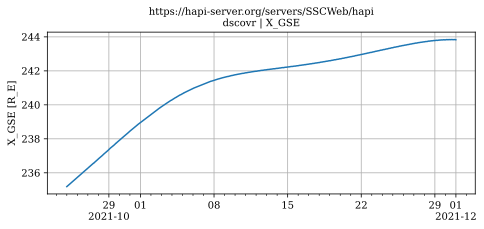

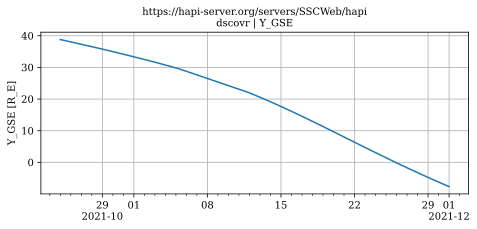

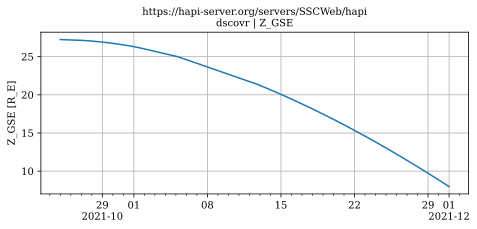

In [ ]:
server = "https://hapi-server.org/servers/SSCWeb/hapi"
dataset = "dscovr"
parameters = "X_GSE,Y_GSE,Z_GSE"
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

## <span style='background-color:yellow'>Problem 01b</span>

Earlier in this notebook, the Dst index was obtained from the CDAWeb HAPI server. The [Dst index](https://isgi.unistra.fr/indices_dst.php) is based on magnetic field measurements from four mid-latitude magnetometer instruments. The codes for the instruments are HER, SJG, HON, and KAK. The [INTERMAGNET](https://intermagnet.org/) project provides data from hundreds of magnetometer instruments through a HAPI server: https://hapi-server.org/servers/#server=INTERMAGNET.

Obtain data from one or more of HER, SJG, HON, and KAK over the time range given below and compare it to the Dst index over the same time range. Can you "see" how the Dst index is formed based on the measurements from the individual magnetometers?

- HER: Hermanus, South Africa, (Lat, Lon) = (-34.43, 19.23)
- SJG: San Juan, USA, (Lat, Lon) = (18.11, 293.85)
- HON: Honolulu, USA, (Lat, Lon) = (21.32, 202)
- KAK: Kakioka, Japan, (Lat, Lon) = (36.232, 140.186)

---

- Definitive: Data are defined as the final adopted data values. Definitive data will only be distributed by the institution responsible for the observatory.

- PT1M: Minute cadence data

- H: the horizontal intensity of the magnetic field vector
- D: magnetic declination, defined as the angle between true north (geographic north) and the magnetic north (the horizontal component of the field). D is positive eastward of true North.
- Z: the vertical component of the magnetic field vector; by convention Z is positive downward

Dst (Disturbance Storm Time) is a measure of the decrease in the horizontal component of the Earth’s magnetic field near the magnetic equator due to increases in the magnetospheric ring current. Values less than −50 nanotesla (nT) indicate high geomagnetic activity.

- [What are the INTERMAGNET data types?](https://intermagnet.org/faq/03.intermagnet-data-types.html)
- [Magnetic components](https://geomag.nrcan.gc.ca/mag_fld/comp-en.php)
- [The Disturbance Storm Time Index](https://www.ngdc.noaa.gov/stp/geomag/dst.html)
- [AER Dst Index](https://www.aer.com/science-research/space/space-weather/space-weather-index/)

In [ ]:
import pandas

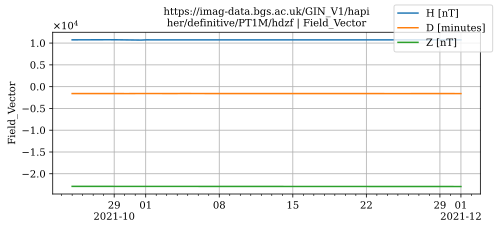

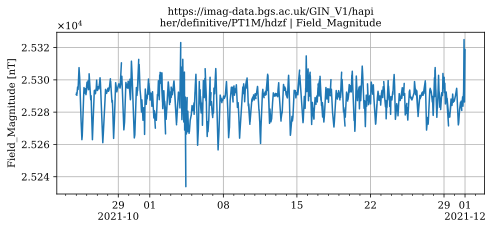

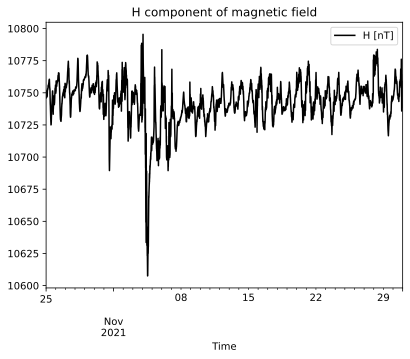

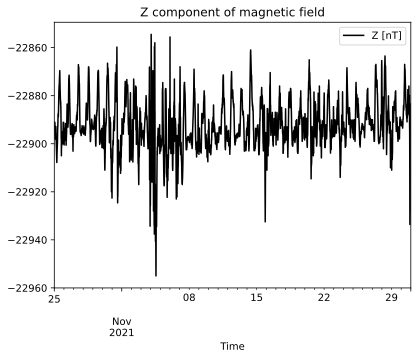

In [ ]:
server = "https://imag-data.bgs.ac.uk/GIN_V1/hapi"
dataset = "her/definitive/PT1M/hdzf"
parameters = "Field_Vector,Field_Magnitude"
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

df = pandas.DataFrame(data['Field_Vector'])
df['Time'] = hapitime2datetime(data['Time'])
df.set_index('Time', inplace=True)
df.columns = ['H [nT]', 'D [minutes]', 'Z [nT]']
df.plot(y='H [nT]', title='H component of magnetic field', color='k')
df.plot(y='Z [nT]', title='Z component of magnetic field', color='k');

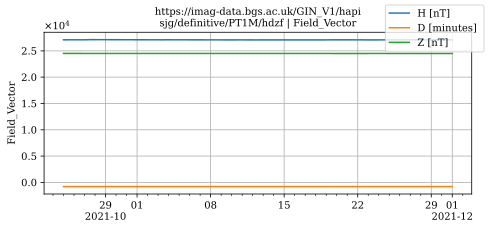

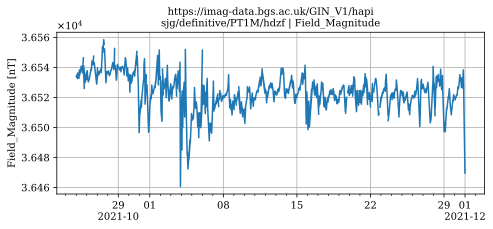

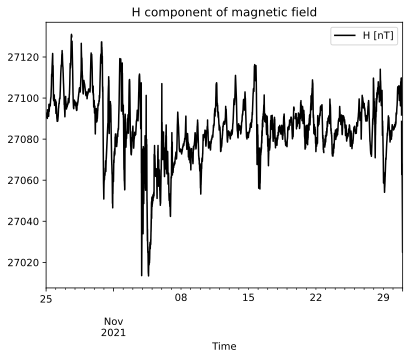

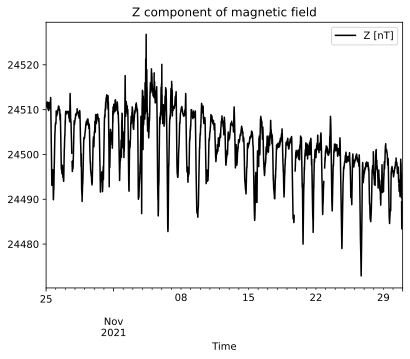

In [ ]:
server = "https://imag-data.bgs.ac.uk/GIN_V1/hapi"
dataset = "sjg/definitive/PT1M/hdzf"
parameters = "Field_Vector,Field_Magnitude"
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

df = pandas.DataFrame(data['Field_Vector'])
df['Time'] = hapitime2datetime(data['Time'])
df.set_index('Time', inplace=True)
df.columns = ['H [nT]', 'D [minutes]', 'Z [nT]']
df.plot(y='H [nT]', title='H component of magnetic field', color='k')
df.plot(y='Z [nT]', title='Z component of magnetic field', color='k');

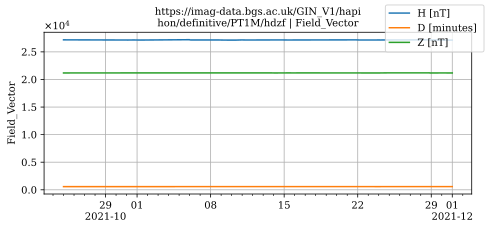

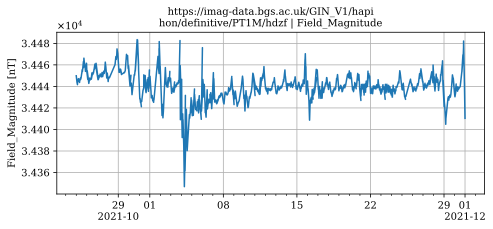

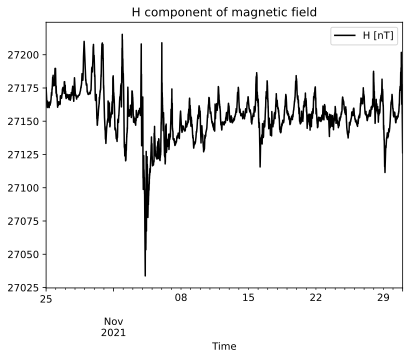

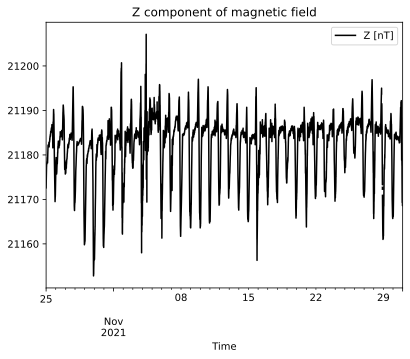

In [ ]:
server = "https://imag-data.bgs.ac.uk/GIN_V1/hapi"
dataset = "hon/definitive/PT1M/hdzf"
parameters = "Field_Vector,Field_Magnitude"
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

df = pandas.DataFrame(data['Field_Vector'])
df['Time'] = hapitime2datetime(data['Time'])
df.set_index('Time', inplace=True)
df.columns = ['H [nT]', 'D [minutes]', 'Z [nT]']
df.plot(y='H [nT]', title='H component of magnetic field', color='k')
df.plot(y='Z [nT]', title='Z component of magnetic field', color='k');

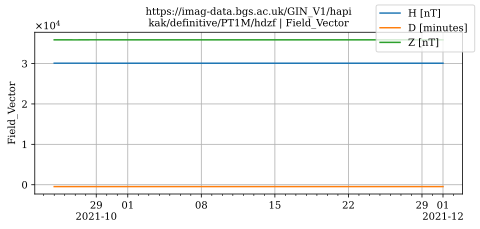

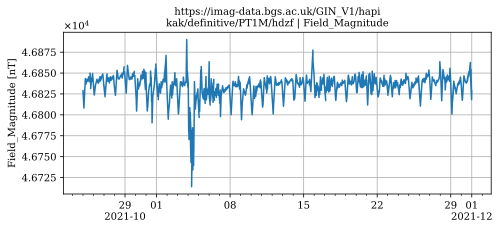

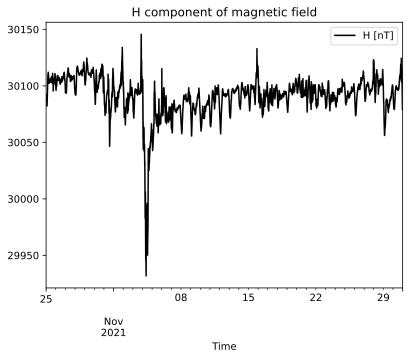

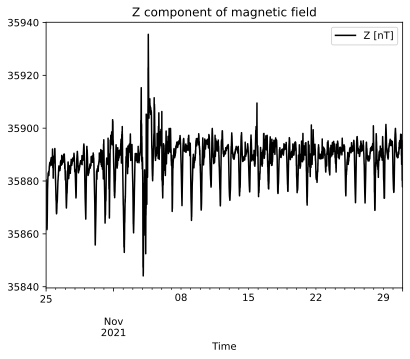

In [ ]:
server = "https://imag-data.bgs.ac.uk/GIN_V1/hapi"
dataset = "kak/definitive/PT1M/hdzf"
parameters = "Field_Vector,Field_Magnitude"
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

df = pandas.DataFrame(data['Field_Vector'])
df['Time'] = hapitime2datetime(data['Time'])
df.set_index('Time', inplace=True)
df.columns = ['H [nT]', 'D [minutes]', 'Z [nT]']
df.plot(y='H [nT]', title='H component of magnetic field', color='k')
df.plot(y='Z [nT]', title='Z component of magnetic field', color='k');